<a href="https://colab.research.google.com/github/ManasaAthota/MachineLearning/blob/master/Als_Trainngdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
!pip install pandas==0.25

In [326]:
!pip install pandas-profiling  # for a quick data exploratory analysis

In [327]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling as pf
import matplotlib as mat
from pandas_profiling import ProfileReport
%matplotlib inline


In [328]:
!pip install matplotlib-venn # for venn diagram 

In [329]:
df=pd.read_csv('/content/ALS_TrainingData_2223.csv')
df.head()


ID  Age_mean  Albumin_max  ...  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min
0   1        65         57.0  ...           6.0              6.0           6.0
1   2        48         45.0  ...           7.0              5.0           5.0
2   3        38         50.0  ...           6.0              5.0           5.0
3   4        63         47.0  ...           7.0              6.0           5.0
4   5        63         47.0  ...           6.0              5.0           5.0

[5 rows x 101 columns]

In [330]:
df.shape #size of the training data

(2223, 101)

In [299]:
report=pf.ProfileReport(df)
report # provides the EDA of the dataset

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [331]:
Deleted_columns=report.get_rejected_variables() #deletes the variables which are not necessary 


In [332]:
Deleted_columns

['Hematocrit_median',
 'Hematocrit_min',
 'mouth_median',
 'Platelets_min',
 'SubjectID']

In [333]:
df.drop(Deleted_columns,axis=1)

ID  Age_mean  Albumin_max  ...  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min
0        1        65         57.0  ...          6.00              6.0           6.0
1        2        48         45.0  ...          7.00              5.0           5.0
2        3        38         50.0  ...          6.00              5.0           5.0
3        4        63         47.0  ...          7.00              6.0           5.0
4        5        63         47.0  ...          6.00              5.0           5.0
...    ...       ...          ...  ...           ...              ...           ...
2218  2419        33         50.0  ...          7.00              6.0           5.0
2219  2420        61         47.0  ...          7.41              5.5           5.0
2220  2421        47         46.0  ...          9.00              6.0           5.0
2221  2422        37         49.0  ...          6.00              5.0           5.0
2222  2424        48         48.0  ...          5.00              5.0           5.0

[2223 rows x 96 columns]

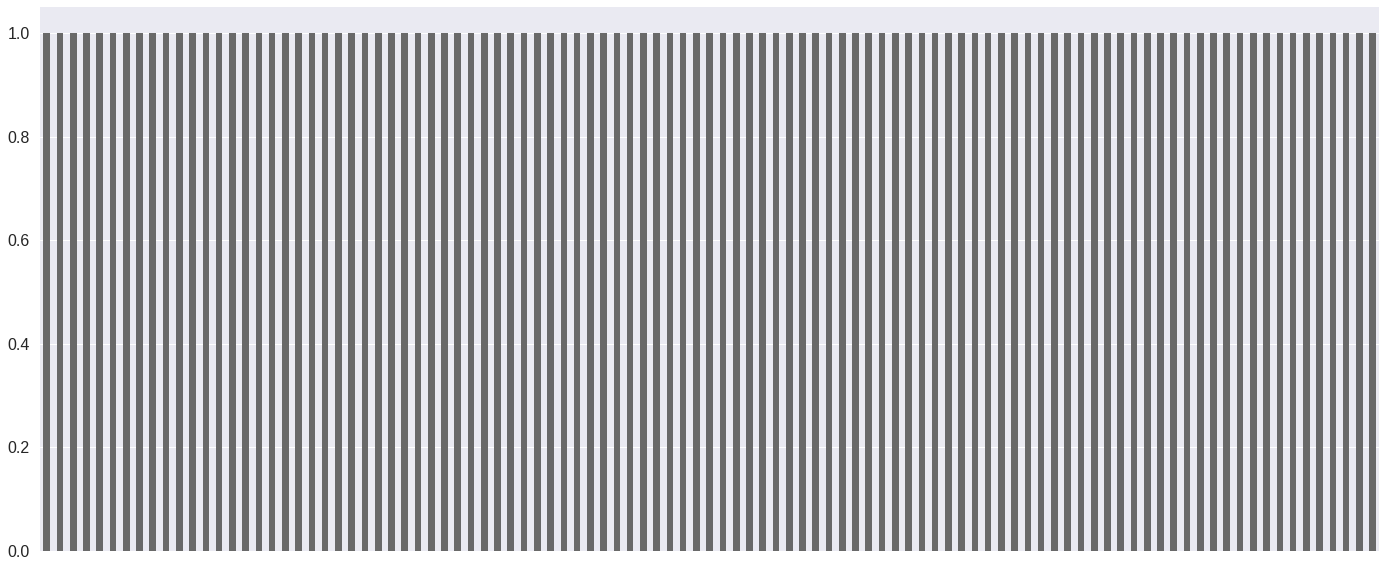

In [334]:
#msno.matrix(df)
msno.bar(df) # to show the missing values through bar garph

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb93ea2af98>,
      dtype=object)

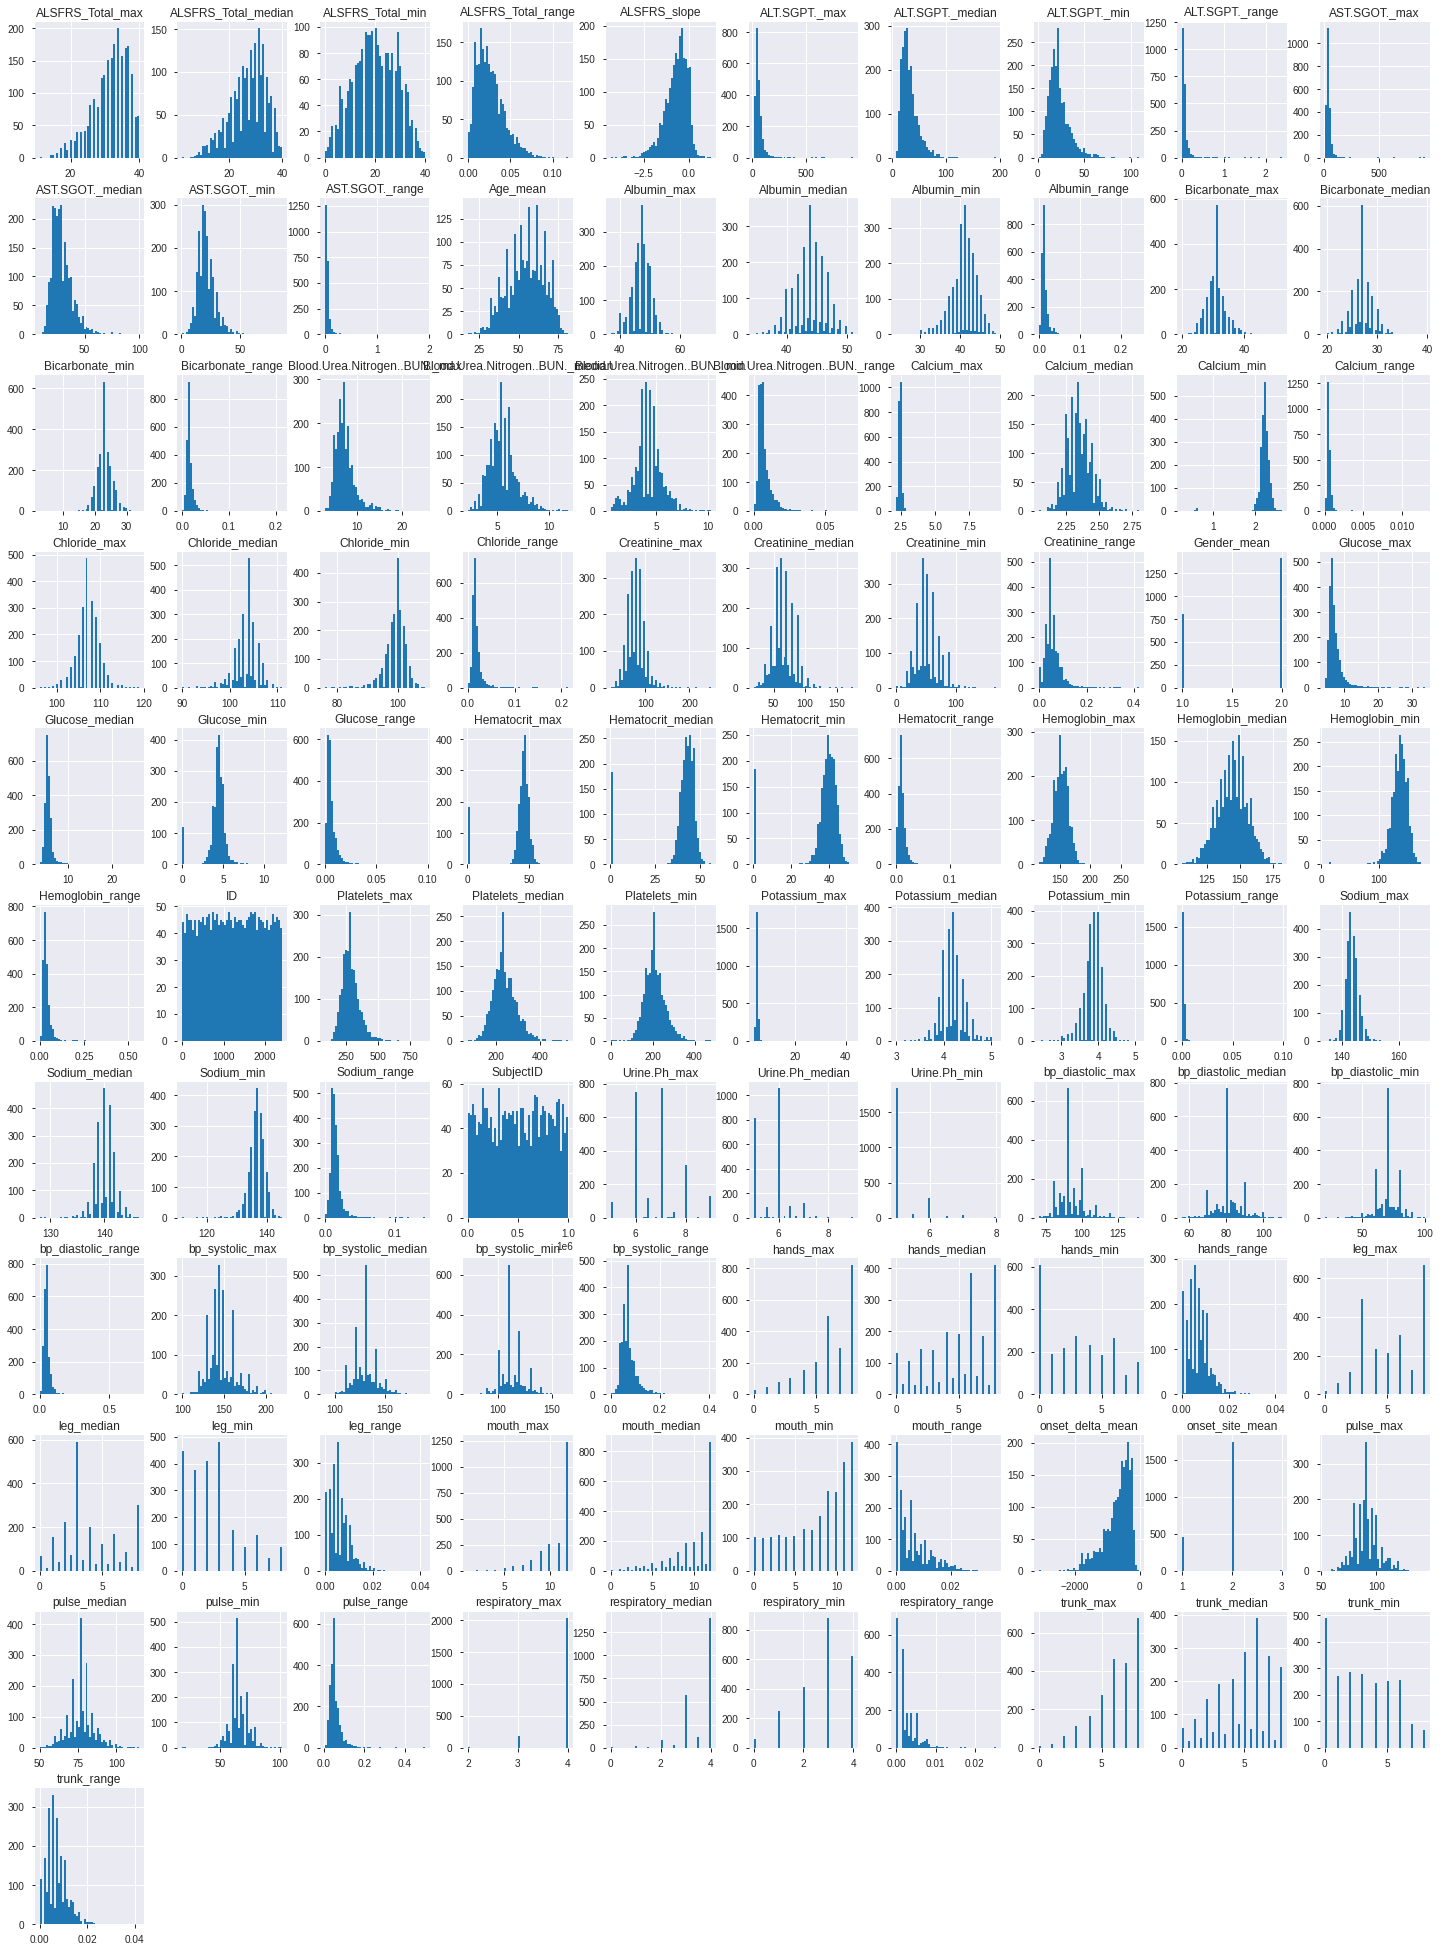

In [420]:
df.hist(figsize=(25,35),bins=50)

**The ALSFRS slope over time** : since its difficult to figure out the correlation between large amount  of data just considered the medians of the variables and checked the correlation.

In [336]:
#correlation_matrix = df[['Age_mean','ALSFRS_slope']].corr()
#sns.heatmap(correlation_matrix,annot=None,fmt='2g')
df.corr()

ID  Age_mean  ...  Urine.Ph_median  Urine.Ph_min
ID               1.000000  0.007008  ...        -0.016045      0.002042
Age_mean         0.007008  1.000000  ...         0.002561     -0.008615
Albumin_max     -0.014141 -0.276195  ...        -0.046885     -0.138430
Albumin_median  -0.011243 -0.349024  ...        -0.042497     -0.118506
Albumin_min     -0.009921 -0.297121  ...        -0.001877     -0.049783
...                   ...       ...  ...              ...           ...
trunk_min        0.015915  0.065092  ...        -0.013682      0.020322
trunk_range     -0.000649  0.036559  ...         0.051023      0.021281
Urine.Ph_max    -0.022561 -0.001532  ...         0.487953      0.073412
Urine.Ph_median -0.016045  0.002561  ...         1.000000      0.525513
Urine.Ph_min     0.002042 -0.008615  ...         0.525513      1.000000

[101 rows x 101 columns]

In [337]:
#figuringout the corelation values of each variables median
filter_col = [col for col in df if col.endswith("median")]
med_corr=df[filter_col].corr().round(1)

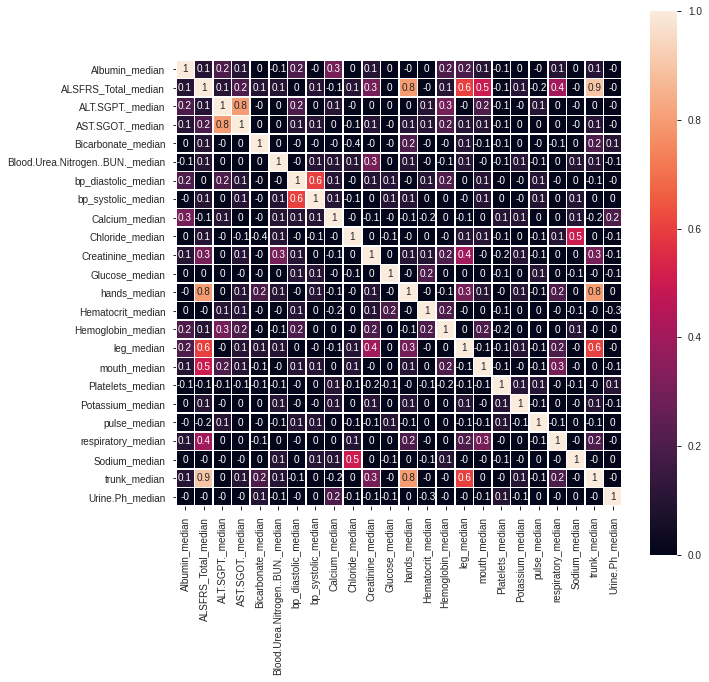

In [338]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(med_corr,annot=True,vmin=0,vmax=1,square=True,linewidths=.5,ax=ax)

**From the above corelation of the median variables the correlation of the trunk_median and the AlSFRS_Total_medain values are near to 1.**


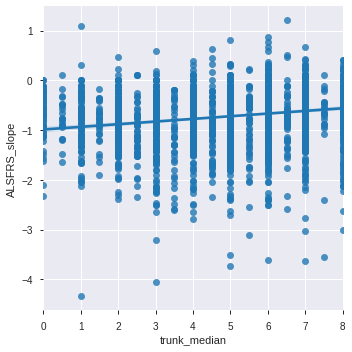

In [339]:
sns.lmplot(x='trunk_median',y='ALSFRS_slope',data=df,fit_reg=True)

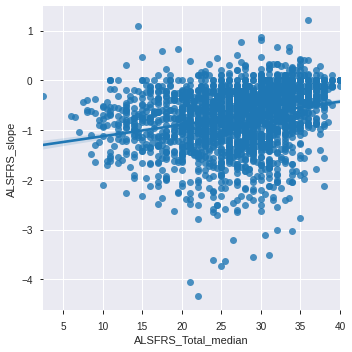

In [341]:
sns.lmplot(x='ALSFRS_Total_median',y='ALSFRS_slope',data=df,fit_reg=True)

**K-Mean Clustering**

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x=df.values
x=StandardScaler().fit_transform(x)

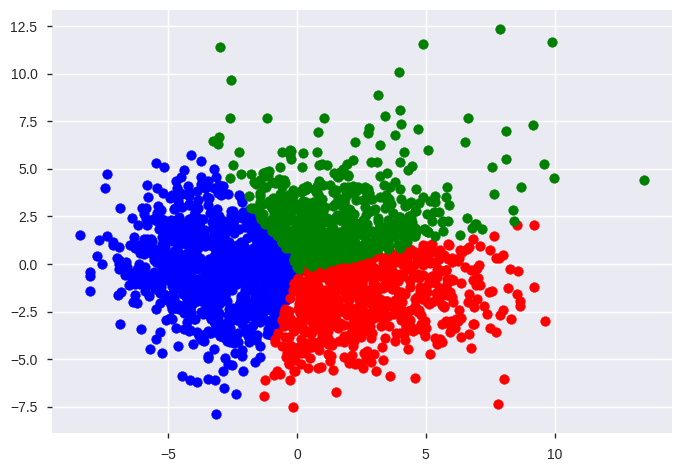

In [282]:
pca_model=PCA(2)
components=pca_model.fit_transform(x)
df=pd.DataFrame(data=components,columns=['x','y'])
from sklearn.cluster import KMeans, SpectralClustering
km=KMeans(n_clusters=3,max_iter=100)
km.fit(df)
df['labels']=list(km.labels_)
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')


In [283]:
Centriods=km.cluster_centers_
Centriods

array([[-3.0965979 , -0.26333295],
       [ 2.83318444, -1.87779013],
       [ 1.60476896,  2.52880106]])

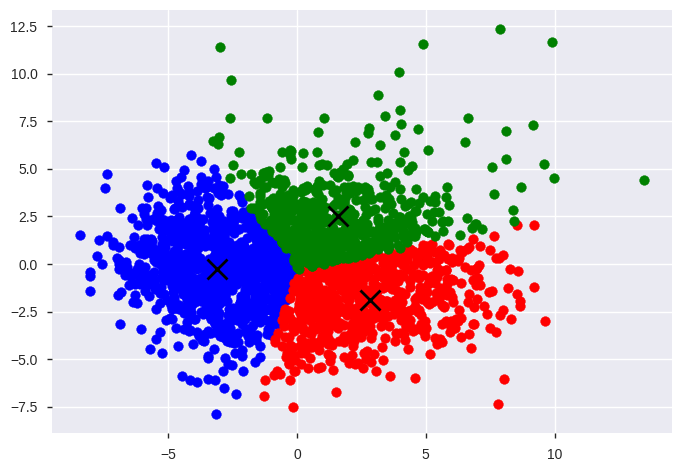

In [284]:
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
lines = plt.plot(Centriods[0,0],Centriods[0,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
lines = plt.plot(Centriods[1,0],Centriods[1,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')
lines = plt.plot(Centriods[2,0],Centriods[2,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
plt.show()

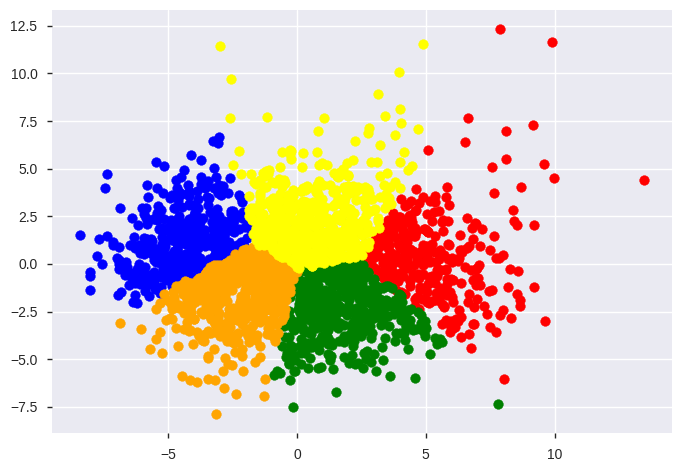

In [170]:
km=KMeans(n_clusters=5,max_iter=100)
km.fit(df)
df['labels']=list(km.labels_)
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')
cluster4=df[df['labels']==3]
plt.scatter(cluster4['x'],cluster4['y'],color='orange')
cluster5=df[df['labels']==4]
plt.scatter(cluster5['x'],cluster5['y'],color='yellow')


#**Compute** **Centroids**

In [175]:
#centriod for 5 clusters
Centriods=km.cluster_centers_
Centriods

array([[-4.40236357e+00,  1.35687043e+00,  2.44249065e-15],
       [ 5.16551313e+00,  4.20481561e-01,  3.00000000e+00],
       [ 1.78173024e+00, -2.36448309e+00,  4.00000000e+00],
       [-2.28967770e+00, -1.65988396e+00,  1.00000000e+00],
       [ 6.62812895e-01,  2.37134406e+00,  2.00000000e+00]])

#**After Plotting Centoids**

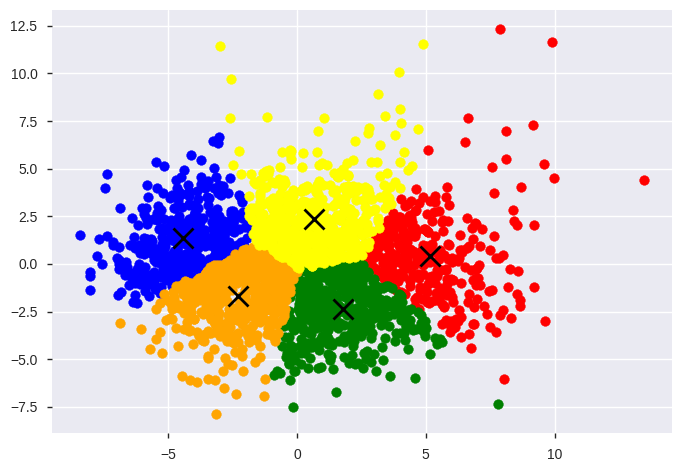

In [181]:
cluster1=df[df['labels']==0]
plt.scatter(cluster1['x'],cluster1['y'],color='b')
lines = plt.plot(Centriods[0,0],Centriods[0,1], 'kx', color= 'black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster2=df[df['labels']==1]
plt.scatter(cluster2['x'],cluster2['y'],color='r')
lines = plt.plot(Centriods[1,0],Centriods[1,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster3=df[df['labels']==2]
plt.scatter(cluster3['x'],cluster3['y'],color='g')
lines = plt.plot(Centriods[2,0],Centriods[2,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster4=df[df['labels']==3]
plt.scatter(cluster4['x'],cluster4['y'],color='orange')
lines = plt.plot(Centriods[3,0],Centriods[3,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
cluster5=df[df['labels']==4]
plt.scatter(cluster5['x'],cluster5['y'],color='yellow')
lines = plt.plot(Centriods[4,0],Centriods[4,1], 'kx', color= 'black')
plt.setp (lines, ms=15.0)
plt.setp(lines, mew=2.0)
plt.show ()

**Evaluation Of Clsuters**

In [418]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)


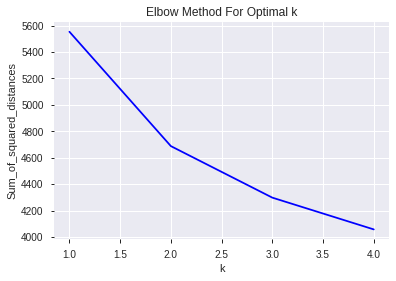

In [419]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()